# Crypto notebook

A notebook looking at data analysis and algo-trading for crypto currencies on coinmarket cap.




In [1]:
# Import our modules here
import json
import requests
import pandas as pd
import numpy as np
import matplotlib

# Resources

## coindesk API
https://www.coindesk.com/coindesk-api

exameple request url:
```
https://api.coindesk.com/v1/bpi/currentprice.json
```
Updates every 1 minute with USD, EURO and GBP prices

example response

```
{"time":{"updated":"Apr 25, 2021 14:19:00 UTC","updatedISO":"2021-04-25T14:19:00+00:00","updateduk":"Apr 25, 2021 at 15:19 BST"},"disclaimer":"This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org","chartName":"Bitcoin","bpi":{"USD":{"code":"USD","symbol":"&#36;","rate":"49,920.6760","description":"United States Dollar","rate_float":49920.676},"GBP":{"code":"GBP","symbol":"&pound;","rate":"35,982.7733","description":"British Pound Sterling","rate_float":35982.7733},"EUR":{"code":"EUR","symbol":"&euro;","rate":"41,266.4775","description":"Euro","rate_float":41266.4775}}}
```

 ## Coindesk CSV files

go to individual market and you can download OHCL csv for daily prices per time period.

## Coinmarketcap API

There is a free tier for the API, but it mainly gives metadata on the top 100 crypto currencies.

Register for an account and there is a free API key for the basic free package. If you want to take it any further you can check the pricing

example request:
```
import requests

url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?start=1&limit=5000&convert=USD"

payload={}
headers = {
  'X-CMC_PRO_API_KEY': 'your_Key',
  'Cookie': 'cookie'
}
 ```

example response:
```
    "data": [
        {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "slug": "bitcoin",
            "num_market_pairs": 9556,
            "date_added": "2013-04-28T00:00:00.000Z",
            "tags": [
                "mineable",
                "pow",
                "sha-256",
                "store-of-value",
                "state-channels",
                "coinbase-ventures-portfolio",
                "three-arrows-capital-portfolio",
                "polychain-capital-portfolio",
                "binance-labs-portfolio",
                "arrington-xrp-capital",
                "blockchain-capital-portfolio",
                "boostvc-portfolio",
                "cms-holdings-portfolio",
                "dcg-portfolio",
                "dragonfly-capital-portfolio",
                "electric-capital-portfolio",
                "fabric-ventures-portfolio",
                "framework-ventures",
                "galaxy-digital-portfolio",
                "huobi-capital",
                "alameda-research-portfolio",
                "a16z-portfolio",
                "1confirmation-portfolio",
                "winklevoss-capital",
                "usv-portfolio",
                "placeholder-ventures-portfolio",
                "pantera-capital-portfolio",
                "multicoin-capital-portfolio",
                "paradigm-xzy-screener"
            ],
            "max_supply": 21000000,
            "circulating_supply": 18691143,
            "total_supply": 18691143,
            "platform": null,
            "cmc_rank": 1,
            "last_updated": "2021-04-25T17:01:02.000Z",
            "quote": {
                "USD": {
                    "price": 50415.65932339365,
                    "volume_24h": 41345195545.958275,
                    "percent_change_1h": 0.22968432,
                    "percent_change_24h": 0.54377414,
                    "percent_change_7d": -9.43678008,
                    "percent_change_30d": -5.61773489,
                    "percent_change_60d": 1.17103526,
                    "percent_change_90d": 46.23429919,
                    "market_cap": 942326297852.834,
                    "last_updated": "2021-04-25T17:01:02.000Z"
                }
            }
        },
```

## Free crypto API from alternative.me

https://alternative.me/crypto/api/



# Bitcoin market info from API call

practicing parsing a data frame using the market data on Bitcoin. 


In [2]:
# open the demo file taken from a coinmarketcap API request. The file is called coinmarketcap.json
with open("../data_folder/coinmarket.json", "r") as read_file:
    data = json.load(read_file)
    
# market_cap = data['data'][0]['quote']['USD']['market_cap']
name = data['data'][0]['name']
price_btc = data['data'][0]['quote']['USD']
headers = ['price', 'volume 24hr', 'change 1', 'change 24', 'change 7d', 'change 30d', 'change 60d', 'change 90d', 'market cap', 'updated']

# Bitcoin data frame showing a few of the recent market changes
bitcoin_market_data = pd.DataFrame.from_dict(price_btc,orient='index', columns=['BTC'])
bitcoin_market_data


,BTC
price,50819.494158
volume_24h,50819167274.593964
percent_change_1h,0.048054
percent_change_24h,-0.478431
percent_change_7d,-17.110845
percent_change_30d,-3.547308
percent_change_60d,10.287302
percent_change_90d,61.768066
market_cap,949833776895.311157
last_updated,2021-04-24T21:21:02.000Z


# Other Top 10 cryptos market data

looping through the top 10 coins and sorting market data into a data frame

In [3]:
name = data['data'][0]['name']
price_btc = data['data'][0]['quote']['USD']

next_crypto = []
name_of_coin = []
# This value can be changed if you would like to see more coins
number_of_iter = 10
for i in range(number_of_iter):
    name = data['data'][i]['name']
    price_crypto = data['data'][i]['quote']['USD']
#     print(name)
#     print(price_crypto)
    next_crypto.append(price_crypto)
    name_of_coin.append(name)
df = pd.DataFrame(next_crypto,index=name_of_coin)
df.round(1)
df.drop(columns=['volume_24h','last_updated'],inplace=True)
df.rename(columns={"percent_change_1h": "change 1h", "percent_change_24h": "change 24h","percent_change_7d": "change 7d" })

,price,change 1h,change 24h,change 7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap
Bitcoin,50819.494158,0.048054,-0.478431,-17.110845,-3.547308,10.287302,61.768066,9.498338e+11
Ethereum,2284.693451,0.254902,-3.046085,-5.041279,41.343301,55.277585,71.223861,2.641209e+11
Binance Coin,504.353008,-0.760154,-4.111863,-3.458179,112.236051,140.635031,1131.920580,7.738434e+10
Tether,0.999942,0.010592,-0.024542,-1.107158,-0.079717,0.084457,-0.247843,4.942838e+10
XRP,1.077184,-1.521136,-5.181948,-32.594164,106.300281,133.734285,296.579509,4.890848e+10
Cardano,1.127405,-0.470115,-1.819442,-19.589094,1.079105,25.273277,226.965191,3.601869e+10
Dogecoin,0.274452,-0.720892,13.322960,-9.771586,428.493564,525.549284,3083.543281,3.549245e+10
Polkadot,29.927734,-0.314766,-7.295525,-31.482228,-2.420244,-5.705892,71.296803,2.790905e+10
Uniswap,31.091412,0.377000,-6.171208,-13.306052,13.944146,43.165786,183.067375,1.627275e+10
Litecoin,230.333723,-0.419783,-4.066879,-26.768975,31.102861,38.623559,68.588983,1.537533e+10


# OHLC data for BTC/USD

Looking at some csv data of BTC prices and seeing what we can create with it


In [4]:
#Take in the csv dataset and read it using pandas
df = pd.read_csv('../data_folder/BTC_USD_2020-04-26_2021-04-25-CoinDesk (1).csv')
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-04-26,7542.303401,7497.859881,7702.018980,7445.685898
1,BTC,2020-04-27,7624.853786,7542.303101,7707.594271,7503.770143
2,BTC,2020-04-28,7776.507543,7624.854338,7798.276656,7621.487082
3,BTC,2020-04-29,7761.758784,7788.574229,7793.636018,7677.178774
4,BTC,2020-04-30,8773.106488,7761.758619,8973.079277,7725.542654
...,...,...,...,...,...,...
359,BTC,2021-04-21,56608.769748,55723.227263,57121.943902,53442.851660
360,BTC,2021-04-22,54144.427476,56508.151244,56809.146393,53913.850515
361,BTC,2021-04-23,51965.059559,53830.823864,55471.076372,50500.731862
362,BTC,2021-04-24,50669.144382,51714.073970,52111.185068,47467.912032


### A graph of OHLC for BTC/USD over the last year

<AxesSubplot:>

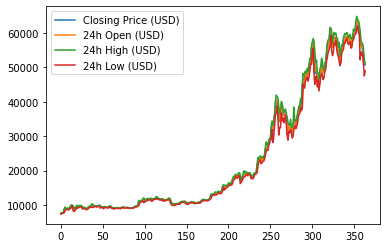

In [5]:
lines = df.plot.line()
lines

### Editable historic prices for BTC in the last year line graph

<AxesSubplot:>

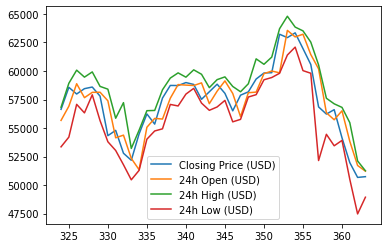

In [6]:
# Lowest days to watch would be 1 and highest 364
days_to_watch = 40
shorter_df = df[-days_to_watch:]
month_of_btc = shorter_df.plot.line()
month_of_btc